In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import unravel_index

In [2]:
###To keep from calling plt.show every time
%matplotlib inline

In [3]:
napster_df = pd.read_csv("../Data/MLC_Data.csv", nrows=100001)

In [4]:
napster_df.shape

(100000, 13)

In [5]:
napster_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [22]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                object
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [18]:
napster_df.columns = ['ISRC','Country_Code','Registrant_Code','Ref_Year','Usage_Period','Streaming_Plat_DSP','Streams','Recording_Artist','Recording_Label','Recording_Title','Release_Title','Recording_Dur_s','Songwriter_Y_N']

In [19]:
napster_df.head()

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [21]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                object
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

(array([50258., 44877.,    96.,   760.,  2248.]),
 array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ]),
 <BarContainer object of 5 artists>)

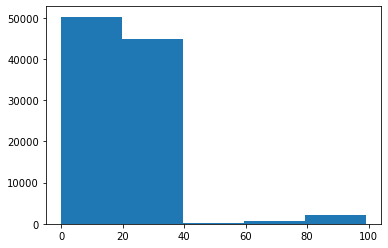

In [20]:
plt.hist(napster_df['Ref_Year'], bins = 5)

(array([45839.,     0.,     0.,     0., 54161.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

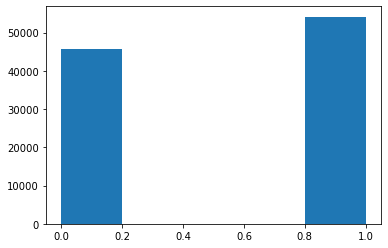

In [26]:
plt.hist(napster_df['Songwriter_Y_N'], bins = 5)

In [28]:
(napster_df['Songwriter_Y_N']==0).sum()

45839

In [29]:
(napster_df['Songwriter_Y_N']==1).sum()

54161